Laura Escobar Crespo 

# **Second graded practice**

**You have to return a clear and detailed explanation on how did you solve the problem and the solution plus the codes you used and how to use them.**

There are several models that try to reproduce the evoluton of an epidemic. The basic one is the SIR model developed by Kermack and McKendrick in 1927. You can get more information about the model from the following sources:

https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

https://mysite.science.uottawa.ca/rsmith43/MAT4996/Epidemic.pdf

or many others. In any case the SIR model looks like this: 

$$\frac{dS}{dt} = -aS\cdot I$$
$$\frac{dI}{dt} = aSI-bI$$
$$\frac{dR}{dt}= bI$$

where $a$ is the infection rate and $b$ is the recovery rate.

a) One person, highly contagious with a new influenza virus, enters a small community that has a population of 1000 (N) individuals that are susceptible to the infection. The virus epidemic spreads quickly and eventually infects all susceptible individuals. The rate constants for this epidemic are

$$a= 0.005 (person)^{-1} (week)^{-1}$$

$$ b = 1 (week)^{-1}$$

Integrate the differential equations using an explicit RK method and determine the following:

1. How many weeks does it take for this epidemic to reach its peak?

2. What is the maximum number of persons sick at the peak of the epidemic?

3. In how many weeks will the epidemic subside (when less than $5\%$ of the susceptible population is still infected)?
     
b) The basic reproduction number is usually denoted by $\mathcal{R}_0$. For this model, the basic reproduction number or contact number for the disease is
                                                        
$$\mathcal{R}_0 = \frac{aN}{b}$$

1. What is the maximum value of $\mathcal{R}_0$ in order to have a maximum of $10\%$ of the population infected at any time?

2. In how many weeks will the epidemic subside in this case?

c) Imagine that you have a very large polulation, let us say $100000$ people. Also imagine that you don't know the infection and recovery rates exactly. 

Let assume the error is $20\%$ on the infection rate only, and that the values you have calculated are:

$$a=0.000025 (person)^{-1} (week)^{-1}$$

$$ b = 0.12 (week)^{-1}$$

What is the maximum error you can expect when you try to calculate the time when you reach the maximum number of infected?


######**EXPLANATION PART A**

After importing all the required packages, we have to define the Runge-Kutta Method, which is the responsible to solve our differential equations.
I have to point that the three given differential equations,

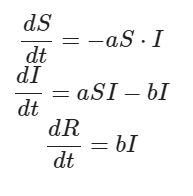

are described as three functions (called dS, dI and dR) that takes as attributes: time (t), S (susceptible people), I (infected), R (recovers), a (infection rate) and b (recovery rate).

Back to the Runge-Kutta Method (in this case the one used is the four order), it is described also as a function (called rk4) that takes as attributes the three functions (they are in a list), a, b, h (size of the interval, or better known as time step). If we look to the expressions for the RK4 method:

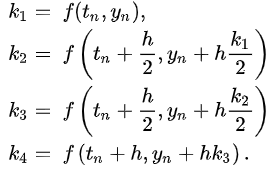

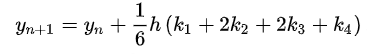

we see that it is an iterative method to approximate the differential equations.

K1 is the slope at the beginning of the interval, K2 and K3 are the slope at the midpoint of the interval (the difference between them is that the first uses K1 and the second2) and K4 is the slope at the end of the interval. 

Knowing that y (in the code, we have three functions represented as d,e,g) is a function of time t, that changes through time. At time t0 the y is y0 (initial value). In all the K-equations, it is used the function y. 

The last equation is approximation of the function when the time is n+1, and the next value of y, but determined by the present value of y.

Now, focusing on the code, I have applied the formulas. First, it is created four empty list for the K-equations where the values are added. For each K-equation, it is used a for loop, to make the computations for all the differential equations.

The function rk4 returns the approximation for time n+1.

The function Model takes as attributes the initial value of S, the initial value of I, the initial value of R, a start time, a time step, a and b.

In the function we stablish the initial values in a list as well as a counter that starts at 0. Then, there is a while loop that ends when the time arrives to the stablish end time (we sum for each iteration the time step). Besides, we define temporary points that changes with the counter (the counter is added plus 1 for each iteration). These temporary points are the corresponding “functions” d, e, g mentioned for the rk4 function. We call the function rk4 to approximate the differential equations. The temporary points are renewed for each iteration, and also added to a list of values for S,I,R.

The function returns three vectors that represents the variation of S, I and R through time.

We have to take in care:

*   The initial value of start time is 0 (as we are representing week 0).
*   The initial value of S is 1000 (all the possible people that can be infected).
*   The initial value of I is 1 (as there is 1 person infected at first).
*   The initial value of R is 0 (as we do not have recovered people or inmune people yet).
*   The time step is, for example, 0.01 (we need a value that converges).
*   The value for a is 0.005.
*   The value for b is 1.

In [ ]:
#PART A
import numpy as np

#Runge-Kutta Method Single Time Step
def rk4(func,t,d,e,g,dt,a,b):    
    k1,k2,k3,k4 = [],[],[],[] #create the rk4 equations as empty list
    for f in func:
        k1.append(dt*f(t,d,e,g,a,b))
    for f in func:
        k2.append(dt*f(t+dt/2,d+k1[0]/2,e+k1[1]/2,g+k1[2]/2,a,b))
    for f in func:
        k3.append( dt*f(t+dt/2,d+k2[0]/2,e+k2[1]/2,g+k2[2]/2,a,b))
    for f in func:
        k4.append( dt*f(t+dt/2,d+k3[0],e+k3[1],g+k3[1],a,b))
    k1,k2,k3,k4 = np.array(k1),np.array(k2),np.array(k3),np.array(k4)
    return (1/6)*(k1+2*k2+2*k3+k4)

# Functions 
def dS(t,S,I,R,a,b):
    return -a*S*I
def dI(t,S,I,R,a,b):
    return a*S*I-b*I
def dR(t,S,I,R,a,b):
    return b*I

def Model(S0,I0,R0,start_time,time_step,a,b):
    S,I,R = [S0],[I0],[R0] #Initial values
    count = 0
    t = start_time 
    dt = time_step 
    while t < 15:
        t += dt
        tempS,tempI,tempR = S[count],I[count],R[count] #Temporary start points
        func = np.array([dS,dI,dR])
        runge_kutta_4 = rk4(func,t,tempS,tempI,tempR,dt,a,b) # Rk4 Function
        tempS += runge_kutta_4[0] #add through time for each one
        tempI += runge_kutta_4[1]
        tempR += runge_kutta_4[2]
        count += 1
        S.append(tempS) #add the calculated values in the list
        I.append(tempI)
        R.append(tempR)
    return S,I,R
#The initial value of start time is 0 (as we are representing week 0)
#The initial value of S is 1000 (all the possible people that can be infected)
#The initial value of I is 1 (as there is 1 person infected at first)
#The initial value of R is 0 (as we do not have recovered people or inmune people yet)
model = Model(1000, 1, 0, 0, 0.01,0.005,1)#Here there is the results for S,I,R as vectors

####*Question 1 and 2 of part A*

For the second question we are asked about the maximum number of infected people that is just calculated as the maximum of the vector I.
For the first question, we need to calculate the number of week that takes to reach that maximum of infected people. I have took that maximum of I, and calculate the index (position on the list). We have to multiply the result of this by the time step (0.01) to get the result in weeks.

*Solution*: The peak of the of the pandemic is reached at the second week (2.11 weeks) and the maximum of infected is 479 people (479.1038782157078 people).



In [ ]:
#1) and 2) of PART A
S_s,I_s,R_s = model[0],model[1],model[2]
maxI = max(I_s) #maximum number of infected people
print(maxI)
max_position = I_s.index(maxI) #weeks to reach the peak (multiply by the time step)
print(max_position)

479.1038782157078
211


####*Question 3 of part A*

For the third question we have to calculate the weeks than the epidemic takes to subside when the 5% of S is greater than I. I create a funtion that takes the vector for S and I, as well as the maximum number of infected people calculated before. I created a for loop of the lenght of the vectors. If the condition explained before is fulfilled as well as it is a week after the peak of the pandemic we take the week.

*Solution*: It takes 10 weeks to subside (10.07 weeks).

In [ ]:
#3) of PART A
def subside(S,I,maxI):
  for i in range(len(S)):
    if I[i]<S[i]*0.05 and i>maxI:
      return i
print(subside(S_s,I_s,maxI))#we have to multiply by the time step to get the result in weeks

1007


######**EXPLANATION PART B**

####*Question 1 of part B*

In this part we have to find an a and b for which maximum number of infected people is not greater than 100 (the 10% of the population).
What I do in this exercise is to create two list with possible values for a and b. I also create two empty list to save those values that satisfy the condition.
With a double for loop, I prove for each value of a and b with the Model funtion explained before. If an a and b satisfy the conditition, we keep these values.
At the end, we have two list with values of a and b that satisfy the condition, but as we only need one for each, I take the first ones.
The funtion reproduction_number calculates the R0.

*Solution*: R0 = 1.69 (1.6949152542372883)

In [ ]:
#PART B
#1)
#We have to find an a and b for which its maximum I is NOT greater than 100
A = np.arange(0.001,0.005,0.001) #we create a list for a and b of number to try
B = np.arange(0.001,1,0.001)
saveA,saveB = [],[] #create an empty list for the optimal values
A = A.tolist() #to transform into a list
B = B.tolist()
for i in A:
  for j in B:
    m = Model(1000,1,0,0,0.01,i,j)
    I_max = max(m[1])
    if I_max<100:
      saveA.append(i) #save the optimal values
      saveB.append(j)
#As we only need one a and b, I take, for example, the first in the list of all the posible options
a_new = saveA[0]
b_new = saveB[0]

def reproduction_number(a,b,N):
  return (a*N)/b

print(reproduction_number(a_new,b_new,1000)) #R0

1.6949152542372883


####*Question 2 of part B*
With the new a and b, we calculate S, I, R and the maximum of infected for these new values. We call the function subside explained before that calculates the weeks.

*Solution*: 1 week

In [ ]:
#2) of PART B
ex2 = Model(1000, 1, 0, 0, 0.01,a_new,b_new)
max_ex2 = max(ex2[1])
subside(ex2[0],ex2[1],max_ex2)#we have to multiply by the time step

100

######**EXPLANATION PART C**

We have to add 20% of a to a, and also substract, obtaining two more a to compute the error of maximum number of infected.
We compute S,I,R for each of the three a's, as well as its peak of maximum number of infected.
Now we have to compare the original a with the other two.
We see the different between the one which a is added its 20% and the the original. Then we do the same for the one substracted. For the first we get an error of -1.01 (take it in absolute value) weeks and for the second 1.5 weeks.

*Solution*: The maximum error is 1.5 weeks.
 

In [ ]:
#PART C
"""
The 20% of a is 5x10^-6.
We obtain two new values for a.
If : a + 5x10^-6 = 3x10^-5
If : a + 5x10^-6 = 2x10^-5
"""
#Calcultion of the model for each variation of a
m_new = Model(100000, 1, 0, 0, 0.01,0.000025,0.12)
m_plus = Model(100000, 1, 0, 0, 0.01,0.00003,0.12)
m_neg = Model(100000, 1, 0, 0, 0.01,0.00002,0.12)
I_new = max(m_new[1])
I_plus = max(m_plus[1])
I_neg = max(m_neg[1])
Pos_new = m_new[1].index(I_new)#to get the time in weeks we have to multiply them by the time step
Pos_plus = m_plus[1].index(I_plus)
Pos_neg = m_neg[1].index(I_neg)

error_plus = 0.01*(Pos_plus-Pos_new)
error_neg = 0.01*(Pos_neg-Pos_new)
print(error_plus,error_neg)#so the maximum error is 1.52

-1.01 1.52


######**Runge Kutta of second order**

All the questions have been solved using Runge Kutta of order 4, but it can be done also with order 2. 
As order 4, order 2 solves differential equations. 
Taking into account the equations for the second order,

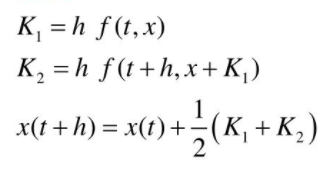

we see that they are pretty similar to the previus ones, but in this case we only have two k-equations.

Also, the equation that it is an approximation of the function when the time is n+1, and the next value of x, but determined by the present value of x, is a bit different but it follows the same idea.

If we focus in the code, there is a function rk2 that takes the initial value of S, the initial value of I, the initial value of R, the time step, a and b.
In the function, we stablish the initials values as well as we a list of values for the time. 

With a for loop, we itearate through time. On the contrary for order 4, here the k-equations for each differntial equation are "separated".

At the end it returns S, I and R as vectors.

In [ ]:
def rk2 (S0,I0,R0,dt,a,b):
  S,R,I=[S0],[R0],[I0] #Initial values
  t = np.arange(0,15,dt) #create a list with the "time"  
  for i in range(t.size):
    kS1 = dS(t,S[i],I[i],R[i],a,b) #calculate the k1 for each differential equation
    kI1 = dI(t,S[i],I[i],R[i],a,b)
    kR1 = dR(t,S[i],I[i],R[i],a,b)
      
    kS2 = dS(t,S[i]+(dt*kS1),I[i]+(dt*kI1),R[i]+(dt*kR1),a,b) #calculate the k2 for each differential equation
    kI2 = dI(t,S[i]+ (dt*kS1),I[i]+(dt*kI1),R[i]+(dt*kR1),a,b)
    kR2 = dR(t,S[i]+(dt*kS1),I[i]+(dt*kI1),R[i]+(dt*kR1),a,b)

    S.append(S[i]+((dt/2)*(kS1+kS2))) #approximation of the function when the time is n+1
    I.append(I[i]+((dt/2)*(kI1+kI2)))
    R.append(R[i]+((dt/2)*(kR1+kR2)))

  return S,I,R
#I have took the same parametes
runge_kutta2 = rk2(1000,1,0,0.01,0.005,1)#Here there is the results for S,I,R as vectors

As example, if we do the first two questions of part a, we see that we obtain almost the same results (only differs in decimals, that are insignificant for our purpose).

So as a conclusion, it is correct to use any of the two as the results are practically the same.

In [ ]:
#1) and 2) of PART A
S_rk2,I_rk2,R_rk2 = runge_kutta2[0],runge_kutta2[1],runge_kutta2[2]
maxI_rk2 = max(I_rk2) #maximum number of infected people
print(maxI_rk2)
max_position_rk2 = I_rk2.index(maxI_rk2) #weeks to reach the peak (multiply by the time step)
print(max_position_rk2)

479.0840582462864
211
